# MICROSOFT'S ENTRY INTO THE MOVIE INDUSTRY

## BUSINESS UNDERSTANDING
This project aims to have an in-depth look into the possibility of Microsoft joining the movie industry as a key player creating original video content and a movie studio. Data collected will be used to observe current trends in top performing movie genres and studios.


## DATA SOURCES
Data analysis will be sourced from several databases.
Financial records pertaining to grossing figures and movie budgets will be sourced from Box Office Movies, IMDB, TMDB and TN databases

In [1]:
#Importing necessary libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import sqlite3 as sql
import csv
import matplotlib.pyplot as plt
%matplotlib inline

# IMDB DATASET

This dataset contains a trove of information regarding movies and will be retrieved below; table by table.

In [2]:
conn = sql.connect('im.db')
cursor = conn.cursor()  
IMDB = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
IMDB

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


## Movie Basics table
This dataset contains a movie id that corresponds with the titles,genres, the year each movie started running and how long it runs for


In [3]:
movie_basics_table = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics_table.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


## Movie Ratings Table

Movie ratings contains movie IDs, number of votes and average rating

In [4]:
movie_ratings_table = pd.read_sql('SELECT * FROM movie_ratings;', conn)
movie_ratings_table.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Movie AKA Table

This table contains information regarding movie release orders, titles, region, languages, attributes, types and if the title in the title column is the original title

In [5]:
movie_akas_table = pd.read_sql('SELECT * FROM movie_akas;', conn)
movie_akas_table.head()


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


## Known_for Table

This table displays a person's ID in the movie industry and the movie ID for the movie that they are known for.

In [6]:
known_for_table = pd.read_sql('SELECT * FROM known_for;', conn)
known_for_table.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


## Principal's Table

This table has infromtion regarding people who work in the movie industry. It matches each indiviadual to a movie, job, category and character.

In [7]:
principals_table = pd.read_sql('SELECT * FROM principals;', conn)
principals_table.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


# BOX OFFICE MOVIE DATASET

This file has data about movie titles, studios that produced them, the year they were produced and the gross total in domestic and foreign markets

In [8]:
bom = pd.read_csv('bom.movie_gross.csv')
bom.describe()
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


# THE MOVIE DATABASE
This dataset has genre IDs, original language and title, popularity, release date and title of the movie.

In [9]:
tmdb = pd.read_csv('tmdb.movies.csv')
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# MOVIE REVIEWS DATA
This tsv file contains reviews from critics. Themovie IDs, reviews, ratings, critic, top critic, publisher and ate are listed in arow corresponding to the movie ID

In [10]:
reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding = 'latin -1')
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


# MOVIE INFO TABLE

Here we have a variety of data including: ID, synopsis, rating, genre, director, writer, theater date, dvd_date, curency, box office, runtime and studio associated with a specific movie.

In [11]:
movie_info =  pd.read_csv('rt.movie_info.tsv', sep='\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


# MOVIE BUDGETS

Movie budgets is a table that looks at the production budget against the groosing figures for each movie in the dataset.

In [12]:
movie_budgets =  pd.read_csv('tn.movie_budgets.csv')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# DATA PREPARATION


### 1. Merging IMDB datasets


In [13]:
#Merge movie_basics_table and movie_ratings_table using movie_id column
imdb_merge= pd.merge(movie_basics_table, movie_ratings_table, on = 'movie_id', how = 'inner')
imdb_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [14]:
imdb_merge1 = pd.merge(principals_table,imdb_merge, on= 'movie_id', how = 'inner').drop(['job','characters'], axis =1)
imdb_merge1

,movie_id,ordering,person_id,category,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0323808,10,nm0059247,editor,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
1,tt0323808,1,nm3579312,actress,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
2,tt0323808,2,nm2694680,actor,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
3,tt0323808,3,nm0574615,actor,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
4,tt0323808,4,nm0502652,actress,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
...,...,...,...,...,...,...,...,...,...,...,...
629750,tt9681728,5,nm10436661,director,A Russian Youth,Malchik russkiy,2019,72.0,"Drama,War",6.6,34
629751,tt9681728,6,nm7442758,producer,A Russian Youth,Malchik russkiy,2019,72.0,"Drama,War",6.6,34
629752,tt9681728,7,nm9645603,cinematographer,A Russian Youth,Malchik russkiy,2019,72.0,"Drama,War",6.6,34
629753,tt9681728,8,nm10436663,actor,A Russian Youth,Malchik russkiy,2019,72.0,"Drama,War",6.6,34


In [15]:
#Select the most recent movies
imdb_recent = imdb_merge1.loc[imdb_merge1["start_year"] >= 2013]
imdb_recent

,movie_id,ordering,person_id,category,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
30,tt0475290,10,nm0005683,cinematographer,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,111422
31,tt0475290,1,nm0000982,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,111422
32,tt0475290,2,nm0000123,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,111422
33,tt0475290,3,nm2403277,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,111422
34,tt0475290,4,nm0000146,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,111422
...,...,...,...,...,...,...,...,...,...,...,...
629750,tt9681728,5,nm10436661,director,A Russian Youth,Malchik russkiy,2019,72.0,"Drama,War",6.6,34
629751,tt9681728,6,nm7442758,producer,A Russian Youth,Malchik russkiy,2019,72.0,"Drama,War",6.6,34
629752,tt9681728,7,nm9645603,cinematographer,A Russian Youth,Malchik russkiy,2019,72.0,"Drama,War",6.6,34
629753,tt9681728,8,nm10436663,actor,A Russian Youth,Malchik russkiy,2019,72.0,"Drama,War",6.6,34


### 2. Merging Boxoffice and movie budgets

In [16]:
movie_finance = pd.merge(bom, movie_budgets, left_on= 'title', right_on = 'movie', how= 'inner')
movie_finance.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"


In [17]:
movie_recent = movie_finance.loc[movie_finance['year'] >= 2013]
movie_recent

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
496,Frozen,BV,400700000.0,875700000,2013,56,"Nov 22, 2013",Frozen,"$150,000,000","$400,738,009","$1,272,469,910"
497,Iron Man 3,BV,409000000.0,805800000,2013,48,"May 3, 2013",Iron Man 3,"$200,000,000","$408,992,272","$1,215,392,272"
498,Despicable Me 2,Uni.,368100000.0,602700000,2013,22,"Jul 3, 2013",Despicable Me 2,"$76,000,000","$368,065,385","$975,216,835"
499,The Hobbit: The Desolation of Smaug,WB (NL),258399999.0,700000000,2013,21,"Dec 13, 2013",The Hobbit: The Desolation of Smaug,"$250,000,000","$258,366,855","$960,366,855"
500,The Hunger Games: Catching Fire,LGF,424700000.0,440300000,2013,38,"Nov 22, 2013",The Hunger Games: Catching Fire,"$130,000,000","$424,668,047","$864,868,047"
...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100"
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,"$13,000,000","$3,703,182","$9,633,111"
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"
1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","$1,427,656"


### 3. Merge all to create a dataframe for this analysis

The datasets IMDB title basics, IMDB title ratings, TN movie budgets and Box Office Movies from the last ten years will rovide the necessary information required to choose what films to invest in.

In [18]:
movie_project = pd.merge(imdb_recent,movie_recent, left_on = 'primary_title', right_on = 'title', how = 'inner')
movie_project

,movie_id,ordering,person_id,category,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,...,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt0475290,10,nm0005683,cinematographer,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!","$22,000,000","$30,080,225","$64,160,680"
1,tt0475290,1,nm0000982,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!","$22,000,000","$30,080,225","$64,160,680"
2,tt0475290,2,nm0000123,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!","$22,000,000","$30,080,225","$64,160,680"
3,tt0475290,3,nm2403277,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!","$22,000,000","$30,080,225","$64,160,680"
4,tt0475290,4,nm0000146,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!","$22,000,000","$30,080,225","$64,160,680"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7976,tt7153766,5,nm0001752,director,Unsane,Unsane,2018,98.0,"Drama,Horror,Mystery",6.4,...,BST,7700000.0,6600000,2018,70,"Mar 23, 2018",Unsane,"$1,500,000","$7,690,044","$14,244,931"
7977,tt7153766,6,nm0077080,writer,Unsane,Unsane,2018,98.0,"Drama,Horror,Mystery",6.4,...,BST,7700000.0,6600000,2018,70,"Mar 23, 2018",Unsane,"$1,500,000","$7,690,044","$14,244,931"
7978,tt7153766,7,nm0007079,writer,Unsane,Unsane,2018,98.0,"Drama,Horror,Mystery",6.4,...,BST,7700000.0,6600000,2018,70,"Mar 23, 2018",Unsane,"$1,500,000","$7,690,044","$14,244,931"
7979,tt7153766,8,nm2722502,producer,Unsane,Unsane,2018,98.0,"Drama,Horror,Mystery",6.4,...,BST,7700000.0,6600000,2018,70,"Mar 23, 2018",Unsane,"$1,500,000","$7,690,044","$14,244,931"


In [19]:
movie_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7981 entries, 0 to 7980
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           7981 non-null   object 
 1   ordering           7981 non-null   int64  
 2   person_id          7981 non-null   object 
 3   category           7981 non-null   object 
 4   primary_title      7981 non-null   object 
 5   original_title     7981 non-null   object 
 6   start_year         7981 non-null   int64  
 7   runtime_minutes    7915 non-null   float64
 8   genres             7979 non-null   object 
 9   averagerating      7981 non-null   float64
 10  numvotes           7981 non-null   int64  
 11  title              7981 non-null   object 
 12  studio             7981 non-null   object 
 13  domestic_gross_x   7981 non-null   float64
 14  foreign_gross      6677 non-null   object 
 15  year               7981 non-null   int64  
 16  id                 7981 

In [20]:
movie_project["domestic_gross_y"] = movie_project["domestic_gross_y"].map(lambda x: x.replace(",", ""))
movie_project["domestic_gross_y"] = movie_project["domestic_gross_y"].map(lambda x: x.replace("$", ""))
movie_project["domestic_gross_y"] = movie_project["domestic_gross_y"].astype("int64")
movie_project["worldwide_gross"] = movie_project["worldwide_gross"].map(lambda x: x.replace(",", ""))
movie_project["worldwide_gross"] = movie_project["worldwide_gross"].map(lambda x: x.replace("$", ""))
movie_project["worldwide_gross"] = movie_project["worldwide_gross"].astype("int64")
movie_project["production_budget"] = movie_project["production_budget"].map(lambda x: x.replace(",", ""))
movie_project["production_budget"] = movie_project["production_budget"].map(lambda x: x.replace("$", ""))
movie_project["production_budget"] = movie_project["production_budget"].astype("int64")
movie_project["foreign_gross"] = movie_project["foreign_gross"].astype("str")
movie_project["foreign_gross"] = movie_project["foreign_gross"].map(lambda x: x.replace(",", ""))
movie_project["foreign_gross"] = movie_project["foreign_gross"].fillna("missing")

In [21]:
movie_project

,movie_id,ordering,person_id,category,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,...,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt0475290,10,nm0005683,cinematographer,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680
1,tt0475290,1,nm0000982,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680
2,tt0475290,2,nm0000123,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680
3,tt0475290,3,nm2403277,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680
4,tt0475290,4,nm0000146,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7976,tt7153766,5,nm0001752,director,Unsane,Unsane,2018,98.0,"Drama,Horror,Mystery",6.4,...,BST,7700000.0,6600000,2018,70,"Mar 23, 2018",Unsane,1500000,7690044,14244931
7977,tt7153766,6,nm0077080,writer,Unsane,Unsane,2018,98.0,"Drama,Horror,Mystery",6.4,...,BST,7700000.0,6600000,2018,70,"Mar 23, 2018",Unsane,1500000,7690044,14244931
7978,tt7153766,7,nm0007079,writer,Unsane,Unsane,2018,98.0,"Drama,Horror,Mystery",6.4,...,BST,7700000.0,6600000,2018,70,"Mar 23, 2018",Unsane,1500000,7690044,14244931
7979,tt7153766,8,nm2722502,producer,Unsane,Unsane,2018,98.0,"Drama,Horror,Mystery",6.4,...,BST,7700000.0,6600000,2018,70,"Mar 23, 2018",Unsane,1500000,7690044,14244931


In [22]:
movie_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7981 entries, 0 to 7980
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           7981 non-null   object 
 1   ordering           7981 non-null   int64  
 2   person_id          7981 non-null   object 
 3   category           7981 non-null   object 
 4   primary_title      7981 non-null   object 
 5   original_title     7981 non-null   object 
 6   start_year         7981 non-null   int64  
 7   runtime_minutes    7915 non-null   float64
 8   genres             7979 non-null   object 
 9   averagerating      7981 non-null   float64
 10  numvotes           7981 non-null   int64  
 11  title              7981 non-null   object 
 12  studio             7981 non-null   object 
 13  domestic_gross_x   7981 non-null   float64
 14  foreign_gross      7981 non-null   object 
 15  year               7981 non-null   int64  
 16  id                 7981 

In [23]:
movie_project["runtime_minutes"] = movie_project["runtime_minutes"].fillna(imdb_recent["runtime_minutes"].median())
movie_project["genres"] = movie_project["genres"].fillna("Missing")
movie_project["genres"] = movie_project["genres"].map(lambda x: x.split(","))

In [24]:
movie_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7981 entries, 0 to 7980
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           7981 non-null   object 
 1   ordering           7981 non-null   int64  
 2   person_id          7981 non-null   object 
 3   category           7981 non-null   object 
 4   primary_title      7981 non-null   object 
 5   original_title     7981 non-null   object 
 6   start_year         7981 non-null   int64  
 7   runtime_minutes    7981 non-null   float64
 8   genres             7981 non-null   object 
 9   averagerating      7981 non-null   float64
 10  numvotes           7981 non-null   int64  
 11  title              7981 non-null   object 
 12  studio             7981 non-null   object 
 13  domestic_gross_x   7981 non-null   float64
 14  foreign_gross      7981 non-null   object 
 15  year               7981 non-null   int64  
 16  id                 7981 

In [25]:
movie_project.head()

,movie_id,ordering,person_id,category,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,...,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt0475290,10,nm0005683,cinematographer,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"[Comedy, Drama, Music]",6.3,...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680
1,tt0475290,1,nm0000982,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"[Comedy, Drama, Music]",6.3,...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680
2,tt0475290,2,nm0000123,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"[Comedy, Drama, Music]",6.3,...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680
3,tt0475290,3,nm2403277,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"[Comedy, Drama, Music]",6.3,...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680
4,tt0475290,4,nm0000146,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"[Comedy, Drama, Music]",6.3,...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680


In [26]:
movie_project['profit'] = movie_project['worldwide_gross'] - movie_project['production_budget']
movie_project

,movie_id,ordering,person_id,category,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,...,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,profit
0,tt0475290,10,nm0005683,cinematographer,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"[Comedy, Drama, Music]",6.3,...,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680
1,tt0475290,1,nm0000982,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"[Comedy, Drama, Music]",6.3,...,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680
2,tt0475290,2,nm0000123,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"[Comedy, Drama, Music]",6.3,...,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680
3,tt0475290,3,nm2403277,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"[Comedy, Drama, Music]",6.3,...,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680
4,tt0475290,4,nm0000146,actor,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"[Comedy, Drama, Music]",6.3,...,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7976,tt7153766,5,nm0001752,director,Unsane,Unsane,2018,98.0,"[Drama, Horror, Mystery]",6.4,...,7700000.0,6600000,2018,70,"Mar 23, 2018",Unsane,1500000,7690044,14244931,12744931
7977,tt7153766,6,nm0077080,writer,Unsane,Unsane,2018,98.0,"[Drama, Horror, Mystery]",6.4,...,7700000.0,6600000,2018,70,"Mar 23, 2018",Unsane,1500000,7690044,14244931,12744931
7978,tt7153766,7,nm0007079,writer,Unsane,Unsane,2018,98.0,"[Drama, Horror, Mystery]",6.4,...,7700000.0,6600000,2018,70,"Mar 23, 2018",Unsane,1500000,7690044,14244931,12744931
7979,tt7153766,8,nm2722502,producer,Unsane,Unsane,2018,98.0,"[Drama, Horror, Mystery]",6.4,...,7700000.0,6600000,2018,70,"Mar 23, 2018",Unsane,1500000,7690044,14244931,12744931


# DATA ANALYSIS

### 1. Observe market trend 

In [27]:
# see trend of total worlwide grossing figures by year
annual_gross = movie_project.explode("genres").groupby("start_year").sum()
annual_gross

,ordering,runtime_minutes,averagerating,numvotes,domestic_gross_x,year,id,production_budget,domestic_gross_y,worldwide_gross,profit
start_year,,,,,,,,,,,
2013,20777,417674.0,24935.9,626800019,2.600652e+11,7657068,193080,201274521190,257729449767,648042293971,446767772781
2014,20684,419926.0,24797.0,594340377,2.420820e+11,7611946,183439,176052300000,241284849521,628320693502,452268393502
2015,20762,420686.0,24424.0,441901452,2.290970e+11,7661798,198800,181043411277,233325150658,605158409866,424114998589
2016,21045,419955.0,24954.5,438510534,2.792236e+11,7780099,207060,202459858984,279073890471,698314564083,495854705099
2017,13701,279138.0,16147.3,291239992,2.014581e+11,5058495,133546,156478773730,201397656725,568104831553,411626057823
2018,13833,286154.0,16284.9,226408601,2.294982e+11,5089119,141278,142991700000,229666672199,583059394636,440067694636
2019,499,10448.0,608.4,1028,3.243910e+09,193382,4406,1461000000,2233230406,2853081198,1392081198


Text(0.5, 1.0, 'worldwide gross vs years')

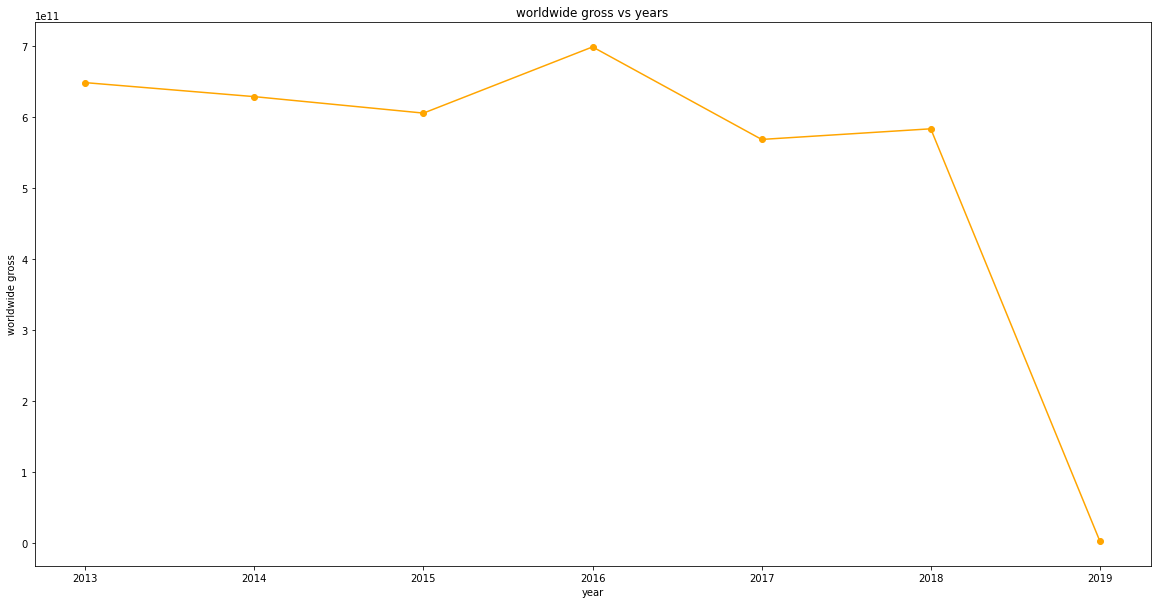

In [28]:
fig2, ax = plt.subplots(figsize=(20, 10))
ax.plot(annual_gross["worldwide_gross"], marker="o", color="orange")
ax.set_ylabel("worldwide gross")
ax.set_xlabel("year")
ax.set_title("worldwide gross vs years")


In [29]:
#The market seems to be steady and predictable with figures staying the same except for a huge drop in 2019 that can be attributed to the global pandemic.

### 2. Top Rated Genres

Text(0.5, 1.0, 'averagerating vs genres')

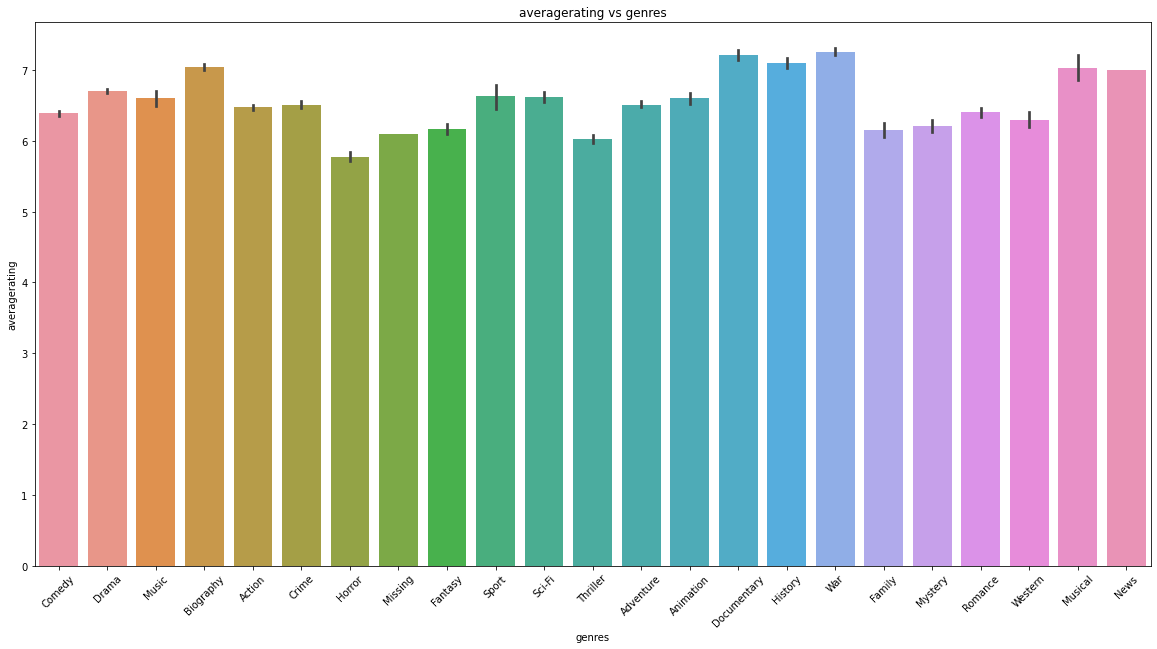

In [30]:
fig1, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x="genres", y="averagerating", data=movie_project.explode("genres"))

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel("genres")
ax.set_ylabel("averagerating")
ax.set_title("averagerating vs genres")


In [31]:
#top rated genres: war, documentary, history,biography, musical

### 3. Top grossing genres

Text(0.5, 1.0, 'worldwide gross vs genres')

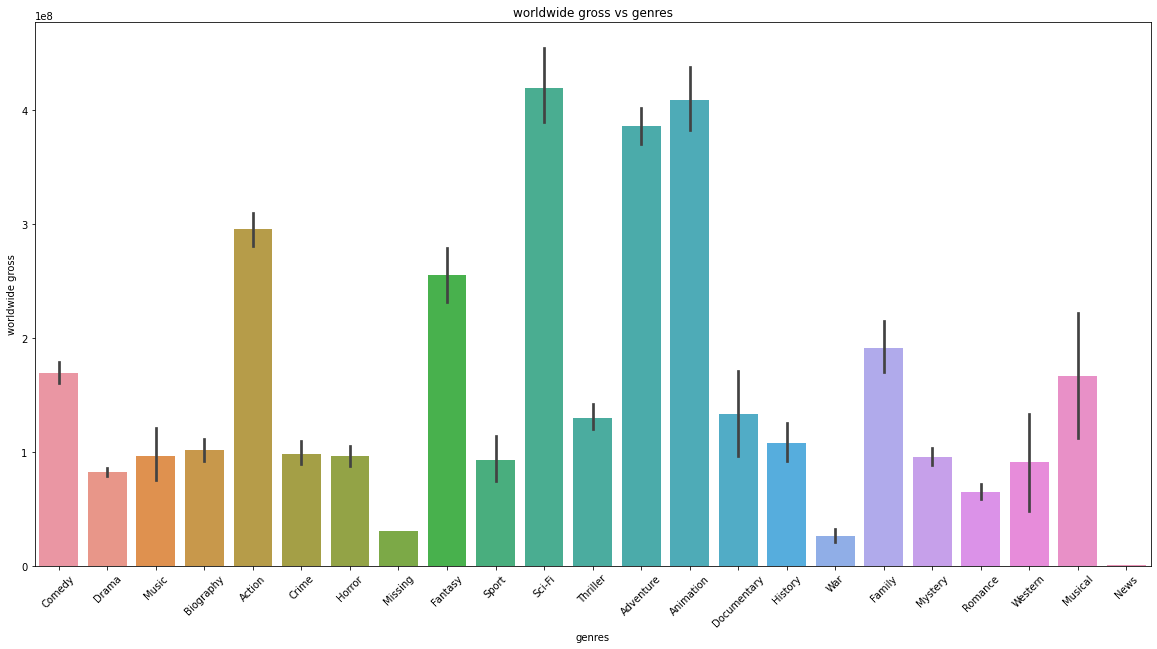

In [32]:
fig1, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x="genres", y="worldwide_gross", data=movie_project.explode("genres"))

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel("genres")
ax.set_ylabel("worldwide gross")
ax.set_title("worldwide gross vs genres")


In [33]:
#Top grossing genres worldwide: Sci-Fi, Animation, Adventure, Action, Fantasy

### 4. profitable genres

Text(0.5, 1.0, 'genres vs profit')

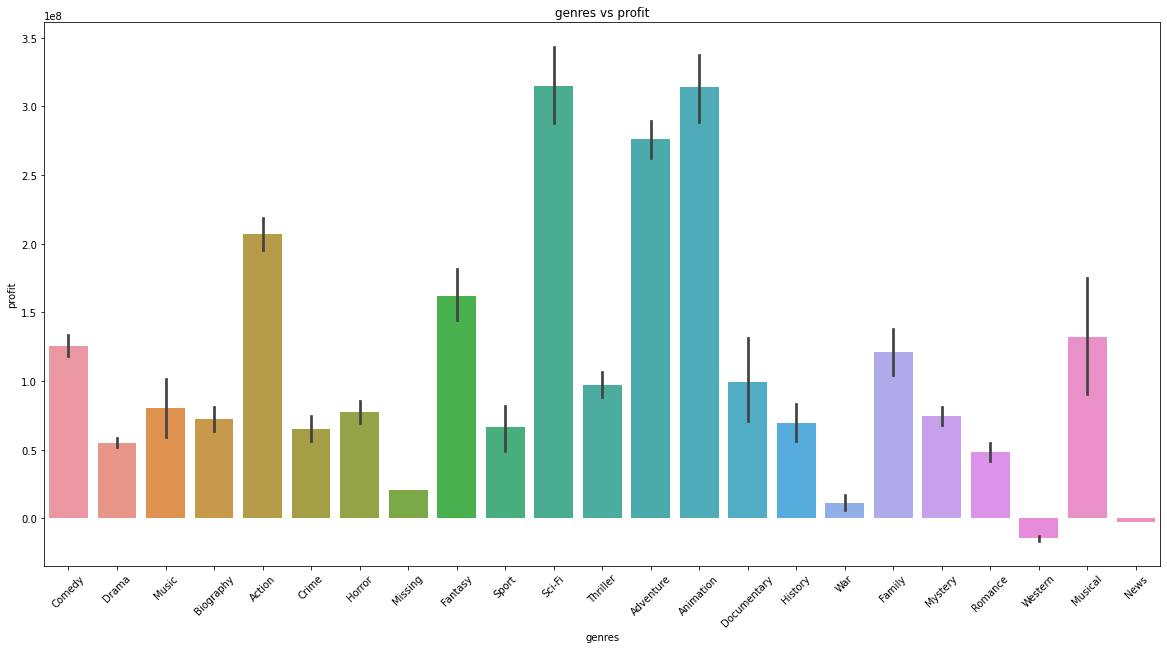

In [34]:
fig1, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x="genres", y="profit", data=movie_project.explode("genres"))

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel("genres")
ax.set_ylabel("profit")
ax.set_title("genres vs profit")


In [35]:
#SciFi, Animation, Adventure, Action, Fantasy yield the most profit.

Text(0.5, 1.0, 'production budget vs profit')

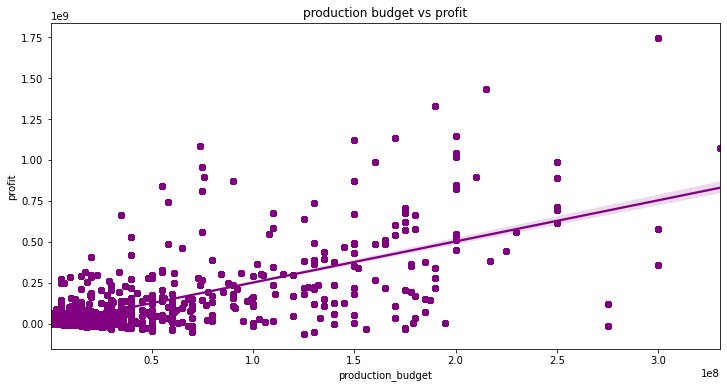

In [36]:
#Relationship between production budgets and profits
fig4, ax = plt.subplots(figsize=(12, 6))

sns.regplot(x="production_budget", y="profit", data=movie_project, ax=ax, color="purple")

ax.set_title("production budget vs profit") 


In [37]:
#An increase in production budget yields an increase in profit

Text(0.5, 1.0, 'production budget vs worldwide gross')

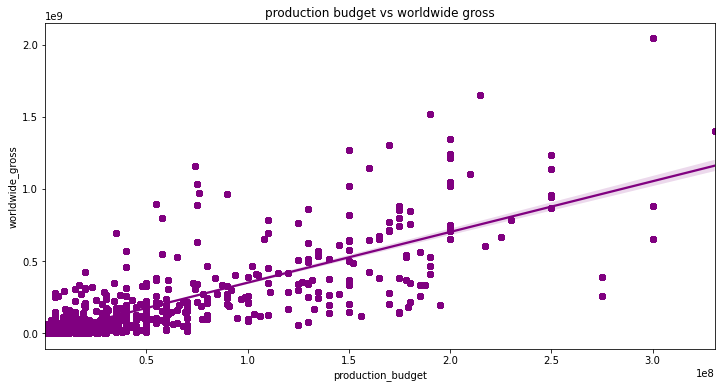

In [38]:
# Relationship between production budget and worldwide gross
fig4, ax = plt.subplots(figsize=(12, 6))

sns.regplot(x="production_budget", y="worldwide_gross", data=movie_project, ax=ax, color="purple")

ax.set_title("production budget vs worldwide gross") 


In [39]:
#This shows that an increase in production budget yields an increase in worldwide gross figures. The two are positively correlated

### 5. Studios

In [40]:
top_genres = movie_project[movie_project['genres'].apply(lambda x: any(i in x for i in ['Action', 'Adventure', 'Animation', 'Fantasy', 'Sci-Fi']))]
top_rated = top_genres.nlargest(100, 'averagerating')
studios = top_rated.groupby('studio').agg({'profit': 'sum', 'averagerating': 'mean'})
studios


,profit,averagerating
studio,,
BV,36512458090,8.3
EOne,49057838,8.3
FoxS,1063850088,8.1
GrtIndia,2335029140,8.3
Par.,5013793750,8.6
RAtt.,-212132480,8.4
UTV,2851546180,8.5
WB,2200980200,8.1


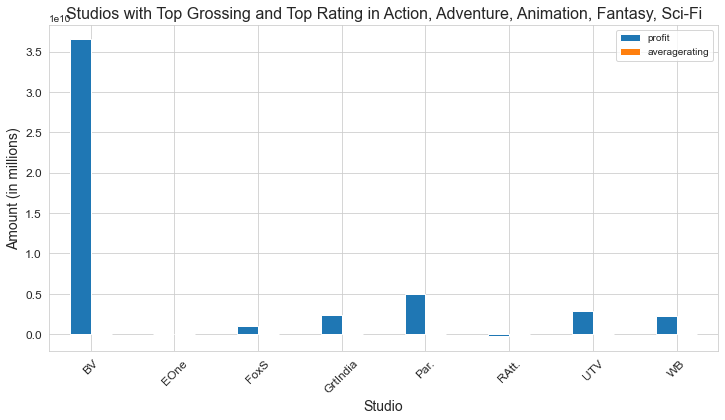

In [41]:

# Plot
sns.set_style('whitegrid')
ax = studios.plot(kind='bar', figsize=(12, 6), rot=45, fontsize=12)
ax.set_xlabel('Studio', fontsize=14)
ax.set_ylabel('Amount (in millions)', fontsize=14)
ax.set_title('Studios with Top Grossing and Top Rating in Action, Adventure, Animation, Fantasy, Sci-Fi', fontsize=16)
plt.show()



# CONCLUSION
1) The movie industry seems to be a stable market with predictable returns 
2) Microsoft needs to invest in top grossing genres such as: Sci-Fi, Animation,Adventure, Action and Fantasy 
3) Though top rated movies rarely make money, they serve as an opportunity to innovate by fusing top grossing content with top rated content in order to dominate the marekt
4) The biggest competitor on both fronts is Buena Vista studio